# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter
from scipy.stats import randint
from IPython.display import display

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv("Dataset_clustering.csv")

In [3]:
data.head()

,Hours_Studied_minmax,Attendance_minmax,Sleep_Hours_minmax,Previous_Scores_minmax,Tutoring_Sessions_minmax,Physical_Activity_minmax,Exam_Score_minmax,Parental_Involvement_encoded,Access_to_Resources_encoded,Motivation_Level_encoded,Family_Income_encoded,Teacher_Quality_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Extracurricular_Activities_encoded,Internet_Access_encoded,Learning_Disabilities_encoded,Gender_encoded,School_Type_encoded,Cluster
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.260870,0,2,0,0,1,0,0,0,1,0,1,1,4
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.130435,0,1,0,1,1,1,1,0,1,0,0,1,6
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.413043,1,1,1,1,1,2,0,1,1,0,1,1,3
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.347826,0,1,1,1,1,0,1,1,1,0,1,1,2
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.326087,1,1,1,1,2,1,0,1,1,0,0,1,6


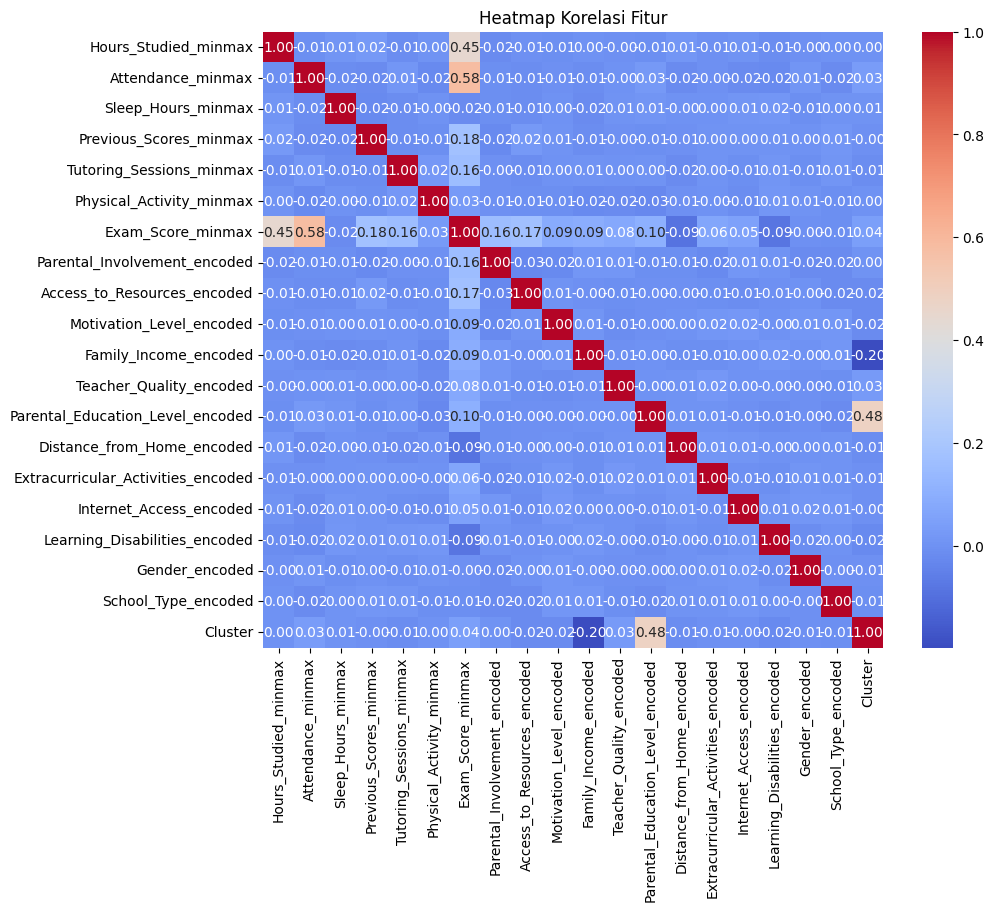

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur")
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Tentukan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])  # Fitur tanpa target
y = data['Cluster']  # Target yang ingin diprediksi

In [6]:
# 3. Bagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print("Ukuran Data Latih:", X_train.shape, y_train.shape)
print("Ukuran Data Uji:", X_test.shape, y_test.shape)

Ukuran Data Latih: (5285, 19) (5285,)
Ukuran Data Uji: (1322, 19) (1322,)


In [8]:
print("Distribusi Label di Data Latih:", Counter(y_train))
print("Distribusi Label di Data Uji:", Counter(y_test))

Distribusi Label di Data Latih: Counter({4: 1075, 2: 1057, 6: 651, 1: 644, 0: 518, 5: 498, 3: 424, 7: 418})
Distribusi Label di Data Uji: Counter({4: 269, 2: 265, 6: 163, 1: 161, 0: 129, 5: 124, 3: 106, 7: 105})


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)  # Latih model Random Forest

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [10]:
# Inisialisasi model XGBoost
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)  # Latih model XGBoost

KNeighborsClassifier()

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [11]:
# Prediksi data uji
y_pred_rf = rf_model.predict(X_test)  # Random Forest
y_pred_knn = knn_model.predict(X_test)  # XGBoost

In [12]:
# Menghitung akurasi
acc_rf = accuracy_score(y_test, y_pred_rf) * 100
acc_knn = accuracy_score(y_test, y_pred_knn) * 100

In [13]:
# Menampilkan hasil akurasi
print(f"🔹 Accuracy (Random Forest): {acc_rf:.2f}%")
print(f"🔸 Accuracy (KNN): {acc_knn:.2f}%")

🔹 Accuracy (Random Forest): 88.65%
🔸 Accuracy (KNN): 96.44%


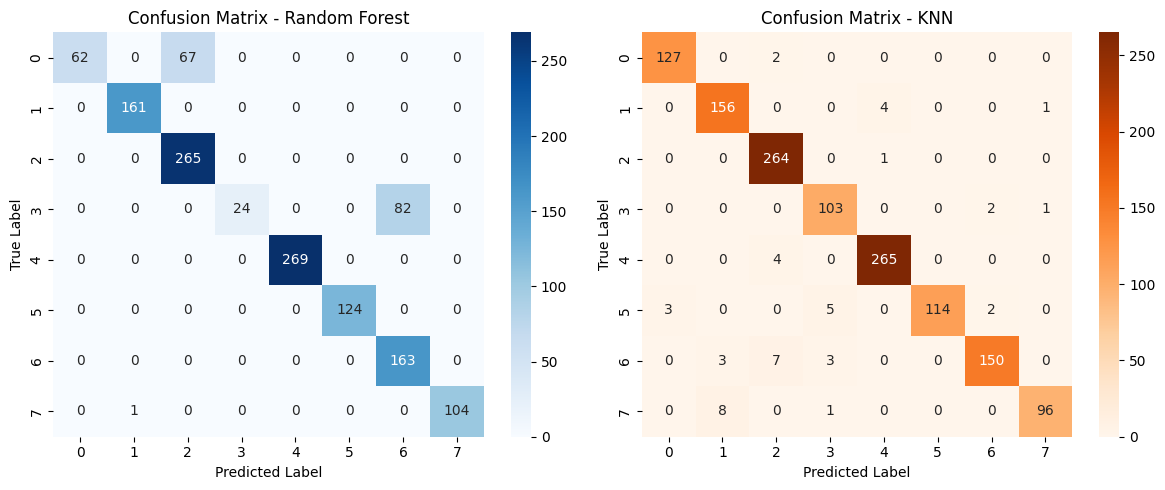

In [14]:
# --- Plot Confusion Matrix ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Random Forest")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Oranges", ax=axes[1])
axes[1].set_title("Confusion Matrix - KNN")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [15]:
# Menghitung metrik evaluasi untuk Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average="weighted")
recall_rf = recall_score(y_test, y_pred_rf, average="weighted")
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

In [16]:
# Menghitung metrik evaluasi untuk XGBoost
precision_knn = precision_score(y_test, y_pred_knn, average="weighted")
recall_knn = recall_score(y_test, y_pred_knn, average="weighted")
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

In [17]:
# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "KNN"],
    "Precision": [precision_rf, precision_knn],
    "Recall": [recall_rf, recall_knn],
    "F1-Score": [f1_rf, f1_knn]
})

In [18]:
# Menampilkan tabel
print(comparison_df)

           Model  Precision    Recall  F1-Score
0  Random Forest   0.917528  0.886536  0.867160
1            KNN   0.965284  0.964448  0.964329


In [19]:
print("Akurasi Random Forest (Train):", rf_model.score(X_train, y_train))
print("Akurasi Random Forest (Test):", rf_model.score(X_test, y_test))
print("Akurasi KNN (Train):", knn_model.score(X_train, y_train))
print("Akurasi KNN (Test):", knn_model.score(X_test, y_test))

Akurasi Random Forest (Train): 0.9072847682119205
Akurasi Random Forest (Test): 0.886535552193646
Akurasi KNN (Train): 0.9816461684011353
Akurasi KNN (Test): 0.9644478063540091


###**Analisis Hasil Evaluasi Model Klasifikasi**

**1. Akurasi**
- KNN memiliki akurasi yang lebih tinggi dibandingkan RF, baik pada data latih maupun data uji.
- Kedua model menunjukkan performa yang baik, dengan perbedaan akurasi yang tidak terlalu besar antara train dan test.
- KNN lebih konsisten dalam menjaga performa di kedua dataset, dengan tingkat akurasi test yang tinggi.

**2.Metrik Evaluasi**
- KNN memiliki nilai Precision, Recall, dan F1-Score lebih tinggi dibandingkan RF.
- KNN lebih baik dalam mengklasifikasikan sampel dengan presisi tinggi, sedangkan RF masih memiliki selisih kecil antara precision dan recall.
- RF tetap memiliki performa yang cukup baik, meskipun tidak sebaik KNN dalam beberapa aspek evaluasi.

**Kesimpulan**
- KNN lebih unggul dibandingkan Random Forest dalam hal akurasi, precision, recall, dan F1-Score.
- Kedua model menunjukkan hasil yang baik, tetapi KNN memiliki keunggulan dalam menangkap pola data lebih efektif.
- Random Forest masih dapat menjadi alternatif yang solid, terutama jika digunakan dalam kondisi dengan fitur yang lebih kompleks.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

**RandomizedSearchCV**

In [20]:
# --- Hyperparameter untuk Random Forest ---
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
# --- Hyperparameter untuk KNN ---
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [22]:
# --- RandomizedSearchCV untuk Random Forest ---
random_rf = RandomizedSearchCV(RandomForestClassifier(), rf_params, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_rf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=1)

In [23]:
# --- RandomizedSearchCV untuk KNN ---
random_knn = RandomizedSearchCV(KNeighborsClassifier(), knn_params, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=1)

In [24]:
print("Best RF Params (RandomizedSearchCV):", random_rf.best_params_)

print("Best KNN Params (RandomizedSearchCV):", random_knn.best_params_)

Best RF Params (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Best KNN Params (RandomizedSearchCV): {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'euclidean'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [25]:
# Gunakan model dengan hyperparameter terbaik
best_rf = RandomForestClassifier(**random_rf.best_params_, random_state=42)
best_knn = KNeighborsClassifier(**random_knn.best_params_)

In [26]:
# Latih model
best_rf.fit(X_train, y_train)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [27]:
# Prediksi
y_pred_rf = best_rf.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

In [28]:
print("Akurasi Random Forest (Train):", best_rf.score(X_train, y_train))
print("Akurasi Random Forest (Test):", best_rf.score(X_test, y_test))
print("Akurasi KNN (Train):", best_knn.score(X_train, y_train))
print("Akurasi KNN (Test):", best_knn.score(X_test, y_test))

Akurasi Random Forest (Train): 1.0
Akurasi Random Forest (Test): 1.0
Akurasi KNN (Train): 0.9911069063386945
Akurasi KNN (Test): 0.9848714069591528


In [29]:
# Simpan hasil evaluasi sebelum tuning (gunakan model awal sebelum hyperparameter tuning)
metrics_before = {
    "Model": ["Random Forest (Sebelum)", "K-Nearest Neighbors (Sebelum)"],
    "Train Accuracy": [accuracy_score(y_train, rf_model.predict(X_train)), accuracy_score(y_train, knn_model.predict(X_train))],
    "Test Accuracy": [accuracy_score(y_test, rf_model.predict(X_test)), accuracy_score(y_test, knn_model.predict(X_test))],
    "Train Precision": [precision_score(y_train, rf_model.predict(X_train), average="weighted"),
                        precision_score(y_train, knn_model.predict(X_train), average="weighted")],
    "Test Precision": [precision_score(y_test, rf_model.predict(X_test), average="weighted"),
                       precision_score(y_test, knn_model.predict(X_test), average="weighted")],
    "Train Recall": [recall_score(y_train, rf_model.predict(X_train), average="weighted"),
                     recall_score(y_train, knn_model.predict(X_train), average="weighted")],
    "Test Recall": [recall_score(y_test, rf_model.predict(X_test), average="weighted"),
                    recall_score(y_test, knn_model.predict(X_test), average="weighted")],
    "Train F1 Score": [f1_score(y_train, rf_model.predict(X_train), average="weighted"),
                       f1_score(y_train, knn_model.predict(X_train), average="weighted")],
    "Test F1 Score": [f1_score(y_test, rf_model.predict(X_test), average="weighted"),
                      f1_score(y_test, knn_model.predict(X_test), average="weighted")]
}

# Simpan hasil evaluasi setelah tuning
metrics_after = {
    "Model": ["Random Forest (Sesudah)", "K-Nearest Neighbors (Sesudah)"],
    "Train Accuracy": [accuracy_score(y_train, best_rf.predict(X_train)), accuracy_score(y_train, best_knn.predict(X_train))],
    "Test Accuracy": [accuracy_score(y_test, best_rf.predict(X_test)), accuracy_score(y_test, best_knn.predict(X_test))],
    "Train Precision": [precision_score(y_train, best_rf.predict(X_train), average="weighted"),
                        precision_score(y_train, best_knn.predict(X_train), average="weighted")],
    "Test Precision": [precision_score(y_test, best_rf.predict(X_test), average="weighted"),
                       precision_score(y_test, best_knn.predict(X_test), average="weighted")],
    "Train Recall": [recall_score(y_train, best_rf.predict(X_train), average="weighted"),
                     recall_score(y_train, best_knn.predict(X_train), average="weighted")],
    "Test Recall": [recall_score(y_test, best_rf.predict(X_test), average="weighted"),
                    recall_score(y_test, best_knn.predict(X_test), average="weighted")],
    "Train F1 Score": [f1_score(y_train, best_rf.predict(X_train), average="weighted"),
                       f1_score(y_train, best_knn.predict(X_train), average="weighted")],
    "Test F1 Score": [f1_score(y_test, best_rf.predict(X_test), average="weighted"),
                      f1_score(y_test, best_knn.predict(X_test), average="weighted")]
}

In [30]:
# Gabungkan hasil evaluasi sebelum & sesudah tuning ke dalam satu DataFrame
df_comparison = pd.concat([pd.DataFrame(metrics_before), pd.DataFrame(metrics_after)], ignore_index=True)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [31]:
# Tampilkan tabel
display(df_comparison)

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Random Forest (Sebelum),0.907285,0.886536,0.930367,0.917528,0.907285,0.886536,0.894769,0.867160
1,K-Nearest Neighbors (Sebelum),0.981646,0.964448,0.981874,0.965284,0.981646,0.964448,0.981608,0.964329
2,Random Forest (Sesudah),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,K-Nearest Neighbors (Sesudah),0.991107,0.984871,0.991141,0.984961,0.991107,0.984871,0.991096,0.984841


1. Perbandingan Hasil Evaluasi Sebelum & Sesudah
 - Setelah tuning, kedua model mengalami peningkatan performa.
 - Random Forest meningkat drastis hingga mencapai akurasi 100% pada data uji, yang menandakan model dapat mengenali seluruh pola dalam data dengan sempurna.
 - KNN juga mengalami peningkatan, tetapi tidak sebesar RF.
 - Precision, Recall, dan F1-score meningkat pada semua model setelah tuning.

2. Identifikasi Kelemahan
  - Precision atau Recall Rendah untuk Kelas Tertentu:
    - Sebelum tuning, Random Forest memiliki recall lebih rendah (0.8865) dibandingkan KNN (0.9644), yang berarti model lebih sering gagal mendeteksi beberapa sampel dari kelas tertentu.
    - Setelah tuning, recall meningkat menjadi sempurna untuk RF dan lebih tinggi untuk KNN.

  - Overfitting atau Underfitting:
    - Random Forest setelah tuning mencapai akurasi 100% pada data train dan test, yang bisa mengindikasikan model mungkin terlalu spesifik terhadap data yang digunakan.
    - KNN masih memiliki sedikit gap antara train dan test accuracy (99.11% vs. 98.49%), tetapi tetap menunjukkan performa yang tinggi dan lebih generalisasi dibandingkan RF.

3. Rekomendasi Tindakan Lanjutan
 - Validasi Lebih Lanjut
    - Lakukan Cross-Validation untuk memastikan model tetap bekerja dengan baik pada berbagai subset data.
    - Gunakan Confusion Matrix untuk melihat apakah ada kelas yang masih sulit diklasifikasikan.

  - Uji Model dengan Data Baru
    - Pastikan model diuji dengan dataset berbeda untuk melihat apakah akurasi tetap tinggi di luar data latih.
  - Coba Algoritma Alternatif
    - Gradient Boosting atau LightGBM bisa menjadi pilihan jika ingin model yang lebih fleksibel.
    - Support Vector Machine (SVM) dapat diuji jika dataset memiliki pola kompleks.

  - Pengumpulan Data Tambahan
    - Jika model mengalami kesalahan klasifikasi pada kelas tertentu, bisa jadi diperlukan data tambahan untuk meningkatkan performa pada kelas tersebut.